# Algothon 2024: Exploratory Data Analysis
---------

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller



## Understanding the data

In [10]:

# Load the data using pandas
data_path = 'prices.txt'

# creates data frame from text file
# a dataframe (df) is like a table, that is an object is python 
# that we can get info from
prices_df = pd.read_csv(data_path, delim_whitespace=True, header=None)

# get dimensions (aka row and column sizes) of our dataframe
df_shape = prices_df.shape

# Display the first and last few rows of the 
# DataFrame to understand its structure
df_head = prices_df.head()

df_shape, df_head


((500, 50),
       0      1      2      3      4      5      6      7      8      9   ...  \
 0  13.46  71.65  48.46  50.52  52.10  13.00  18.98  47.71  69.49  49.96  ...   
 1  13.48  72.10  48.52  50.50  52.06  12.95  18.95  47.84  69.73  49.93  ...   
 2  13.47  72.35  48.48  50.62  51.80  12.79  18.98  47.98  69.60  49.33  ...   
 3  13.53  72.51  48.42  50.75  51.66  12.66  18.96  48.74  69.54  49.67  ...   
 4  13.64  71.99  48.40  50.65  51.97  12.62  18.89  48.88  69.68  49.46  ...   
 
       40     41     42     43     44     45     46     47     48     49  
 0  32.64  55.76  14.46  58.94  36.71  52.62  49.33  36.22  49.00  56.09  
 1  32.52  55.97  14.44  59.81  36.64  52.58  49.20  36.27  48.84  56.08  
 2  32.48  56.34  14.50  59.04  36.89  52.49  49.48  36.39  48.56  55.90  
 3  32.59  56.32  14.40  58.73  36.94  52.40  49.42  36.41  49.00  56.14  
 4  32.64  56.32  14.36  59.01  37.03  52.44  49.79  36.42  48.14  55.90  
 
 [5 rows x 50 columns])

We can see there are 500 rows and 50 columns. 

Each column represents an instrument (stock). There are 50 instruments, so there are 50 columns. 
Each row represents the price of each instrument (stock) on a particular day. We have been given 500 days of data, so there are 500 rows. 

So prices.txt is training data. We want to build a model that reflects this data without overfitting to it. Then we will be given more data that our model can hopefully also work on. 

## Plotting the data

I will be plotting graph showing over time the changes in actual price vs my estimated price. 

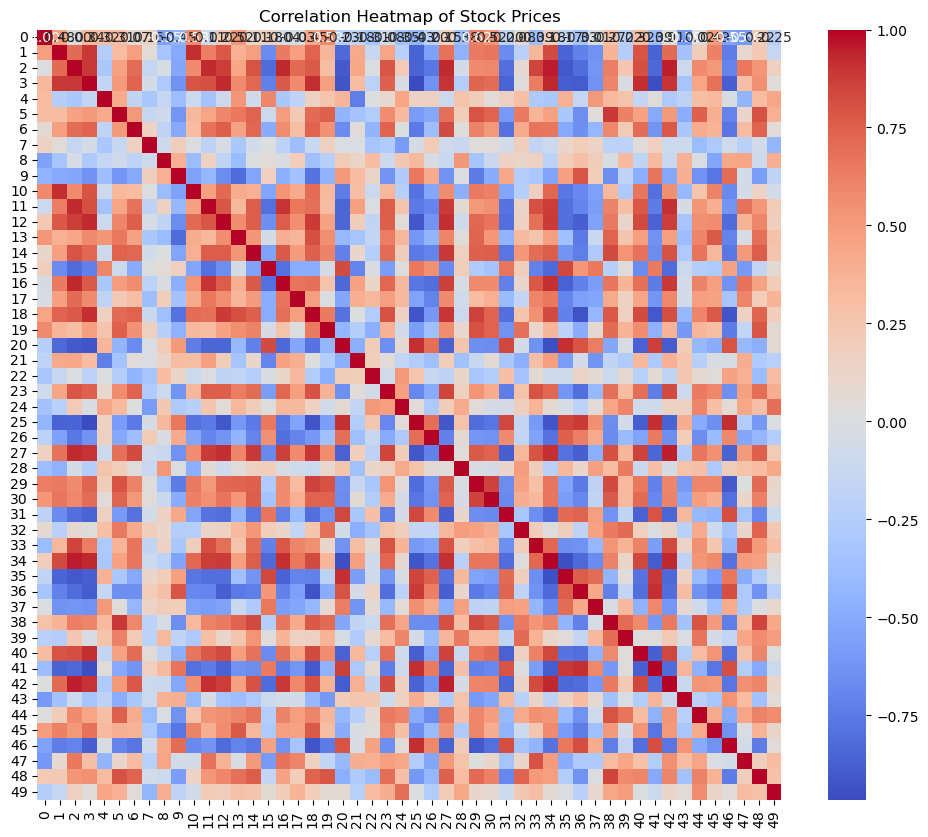

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Load the data
data_path = 'prices.txt'
prices_df = pd.read_csv(data_path, delim_whitespace=True, header=None)


# Correlation Heatmap
# Calculating the correlation matrix
corr_matrix = prices_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Stock Prices')
plt.show()


It appears in this correlation matrix that there are clusters of stocks associated with eachother. I can tell this from the squares of similar colour. 
I should do cluster analysis to identify these as groups that move together.
Ones above a threshold 0.75 maybe. 

Apparently machine learning can be good for clustering.

###  Plotting the stock data

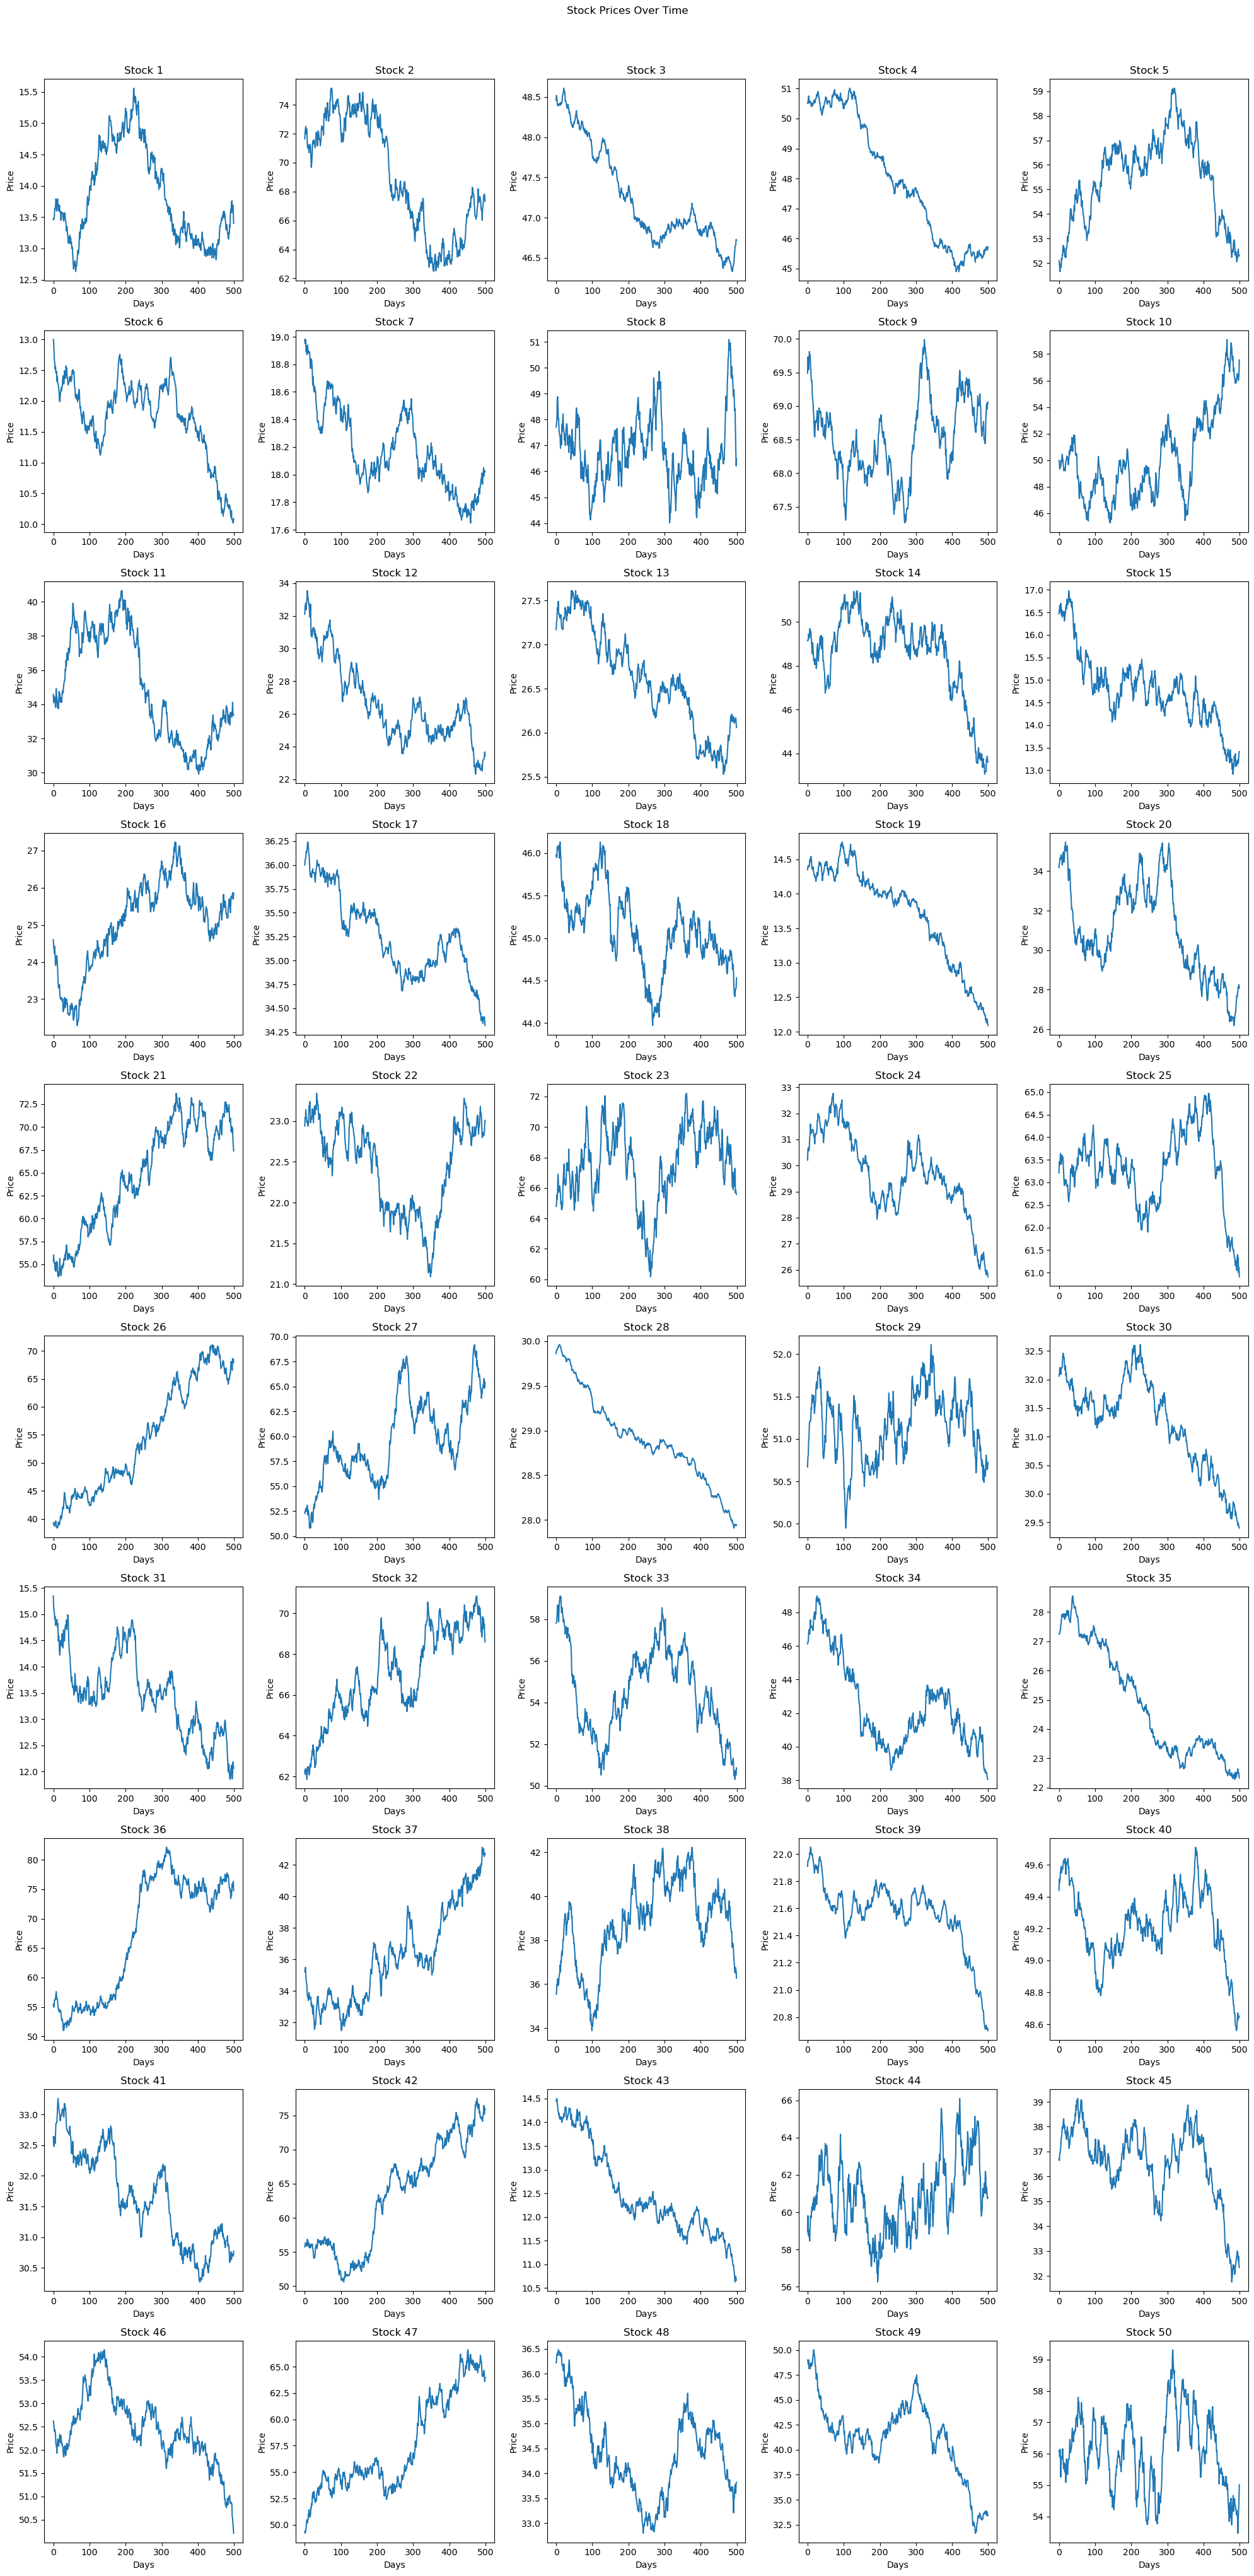

In [8]:
# Number of stocks
num_stocks = prices_df.shape[1]

# Plotting individual stock prices
plt.figure(figsize=(20, 40))
for i in range(num_stocks):
    plt.subplot(10, 5, i + 1)
    plt.plot(prices_df[i])
    plt.title(f'Stock {i + 1}')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.tight_layout()

plt.suptitle('Stock Prices Over Time', y=1.02)
plt.show()

From these plots, we can see some stocks are doing mean reverting (going up and down and then returning the mean) and other stocks have a trend, like they are slowly and consistently plummeting down.

Maybe I could do analysis that showed for stocks that have a z-score close to the mean - showing it is flucuating within bounds, we can use mean regression on those stocks.
- Calculate Z-Scores: Calculate the z-scores for each stock to identify deviations from the mean.
- Statistical Tests: Perform statistical tests like the ADF test for stationarity. Tests like the Augmented Dickey-Fuller (ADF) test or the Phillips-Perron test can help determine if stock prices revert to a mean over time.

Then we can have a different approach like linear regression for the stocks that are not mean-reverting. 

